# LendingClub Loan Analysis

## **Objective**
Build and visualise a model to **predict whether or not borrowers will pay back their loan in full**.  
The prediction is based on various borrower and loan features such as:
- Loan purpose  
- Interest rate  
- FICO credit score  
- Debt-to-income (DTI) ratio  
- Other borrower financial characteristics

Findings from the below analysis show that most LendingClub borrowers are likely to repay their loans, thanks to good credit scores and manageable debt. However, those with high debt-to-income (dti) ratios or debt consolidation loans are more likely to default.

#### Importing Libraries and Loading the Dataset

- Importing the necessary Python libraries for data manipulation, visualisation, and analysis
- Loading and Inspecting the LendingClub loan and customer datasets to understand their structure and contents
- Merging the loan and customer datasets for better insights 

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
loan_data = pd.read_excel('loandataset.xlsx')
customer_data = pd.read_csv('customer_data.csv', sep=';')

In [133]:
loan_data.head()

,loan id,customerid,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,193,C193,1,debt_consolidation,0.0743,178.68,11.461632,1.20,812,16259.04167,50,0.3,0,0,0,0
1,114,C114,1,debt_consolidation,0.0712,64.96,11.608236,0.22,812,16213.00000,50,0.3,0,0,0,0
2,920,C920,1,all_other,0.0800,313.37,10.274672,2.24,792,14100.00000,2751,16.7,0,0,0,0
3,56,C56,1,small_business,0.1059,398.69,11.002100,17.12,747,14008.95833,17214,8.1,2,1,0,0
4,93,C93,1,debt_consolidation,0.0870,383.87,11.918391,4.80,767,13349.95833,61921,39.1,0,0,0,0


In [5]:
customer_data.head()

,id,first_name,last_name,email,gender,city,country
0,C1,Rafaelia,Constable,rconstable0@google.co.jp,Female,Kazanskoye,Russia
1,C2,Rayner,Langhor,rlanghor1@arstechnica.com,Male,Yauca,Peru
2,C3,Felike,Duchesne,fduchesne2@blog.com,Male,Monte Santo de Minas,Brazil
3,C4,Kelli,Winchcomb,kwinchcomb3@tuttocitta.it,Female,Červené Pečky,Czech Republic
4,C5,Timi,Butterley,tbutterley4@jalbum.net,Female,Lorino,Russia


In [6]:
complete_data = pd.merge(loan_data, customer_data, left_on='customerid', right_on='id')
display(complete_data)

,loan id,customerid,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,...,delinq.2yrs,pub.rec,not.fully.paid,id,first_name,last_name,email,gender,city,country
0,193,C193,1,debt_consolidation,0.0743,178.68,11.461632,1.20,812,16259.041670,...,0,0,0,C193,Yuma,Malecky,ymalecky5c@constantcontact.com,Male,Lavradio,Portugal
1,114,C114,1,debt_consolidation,0.0712,64.96,11.608236,0.22,812,16213.000000,...,0,0,0,C114,Steven,Thalmann,sthalmann35@bloglines.com,Male,Rio Meão,Portugal
2,920,C920,1,all_other,0.0800,313.37,10.274672,2.24,792,14100.000000,...,0,0,0,C920,Yetta,Cupitt,ycupittpj@etsy.com,Female,Muruni,Indonesia
3,56,C56,1,small_business,0.1059,398.69,11.002100,17.12,747,14008.958330,...,1,0,0,C56,Mycah,Drohun,mdrohun1j@paypal.com,Male,Tendō,Japan
4,93,C93,1,debt_consolidation,0.0870,383.87,11.918391,4.80,767,13349.958330,...,0,0,0,C93,Anita,Harcus,aharcus2k@jiathis.com,Female,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,20,C20,1,major_purchase,0.1513,173.65,11.002100,2.74,667,1126.958333,...,0,0,0,C20,Krissy,Chamberlayne,kchamberlaynej@dion.ne.jp,Bigender,Liufu,China
995,109,C109,1,all_other,0.1249,234.15,10.043249,5.01,662,1110.000000,...,0,0,0,C109,Christophorus,Mackrill,cmackrill30@nyu.edu,Male,Cha’anpu,China
996,141,C141,1,educational,0.1249,100.35,10.279181,12.77,662,1110.000000,...,1,0,1,C141,Quillan,Pinckney,qpinckney3w@msn.com,Male,Storozhevaya,Russia
997,66,C66,1,all_other,0.1059,32.55,10.433822,14.47,687,1110.000000,...,0,0,1,C66,Alyse,Kobpa,akobpa1t@trellian.com,Female,Cojata,Peru


#### Data Cleaning

Handling missing values, removing duplicates, and ensuring data types are consistent for accurate analysis


In [7]:
complete_data.isnull().sum()

loan id               0
customerid            0
credit.policy         0
purpose               0
int.rate              0
installment           0
log.annual.inc        0
dti                   0
fico                  0
days.with.cr.line     0
revol.bal             0
revol.util            0
inq.last.6mths        0
delinq.2yrs           0
pub.rec               0
not.fully.paid        0
id                    0
first_name            0
last_name             0
email                 0
gender                0
city                 11
country              11
dtype: int64

In [8]:
complete_data = complete_data.dropna()
complete_data.isnull().sum()

loan id              0
customerid           0
credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
id                   0
first_name           0
last_name            0
email                0
gender               0
city                 0
country              0
dtype: int64

In [9]:
complete_data = complete_data.drop_duplicates()

In [10]:
complete_data.duplicated().sum()

np.int64(0)

#### Data Transformation (Grouping and Categorising the data)
- Borrower and loan attributes were grouped into broader categories to make the dataset easier to analyse for trends and relationships
For example:
- FICO credit scores were grouped into rating bands such as *Excellent*, *Good*, and *Fair* to simplify my analysis 
- Loan purposes were grouped into broader segments like *Financial*, *Educational/Business*, and *Other* to better understand reasons for borrowering
- Borrowers were classified into *High Risk* or *Low Risk* categories based on key financial indicators such as DTI, number of late payments, and revolving credit utilisation rates.

In [11]:
#grouping the purpose of the loans into broader categories
def categorise_purpose(purpose):
    if purpose in ['credit_card', 'debt_consolidation']:
        return 'Financial'
    elif purpose in ['eductaional', 'small_business']:
        return 'Educational/Buisness'
    else:
        return'Other'

complete_data['purpose_category']=complete_data['purpose'].apply(categorise_purpose)
display(complete_data)

,loan id,customerid,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,...,pub.rec,not.fully.paid,id,first_name,last_name,email,gender,city,country,purpose_category
0,193,C193,1,debt_consolidation,0.0743,178.68,11.461632,1.20,812,16259.041670,...,0,0,C193,Yuma,Malecky,ymalecky5c@constantcontact.com,Male,Lavradio,Portugal,Financial
1,114,C114,1,debt_consolidation,0.0712,64.96,11.608236,0.22,812,16213.000000,...,0,0,C114,Steven,Thalmann,sthalmann35@bloglines.com,Male,Rio Meão,Portugal,Financial
2,920,C920,1,all_other,0.0800,313.37,10.274672,2.24,792,14100.000000,...,0,0,C920,Yetta,Cupitt,ycupittpj@etsy.com,Female,Muruni,Indonesia,Other
3,56,C56,1,small_business,0.1059,398.69,11.002100,17.12,747,14008.958330,...,0,0,C56,Mycah,Drohun,mdrohun1j@paypal.com,Male,Tendō,Japan,Educational/Buisness
5,503,C503,1,credit_card,0.0832,160.57,10.985293,7.08,767,13319.041670,...,0,0,C503,Dorena,Keely,dkeelydy@alibaba.com,Female,Oued Lill,Tunisia,Financial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,20,C20,1,major_purchase,0.1513,173.65,11.002100,2.74,667,1126.958333,...,0,0,C20,Krissy,Chamberlayne,kchamberlaynej@dion.ne.jp,Bigender,Liufu,China,Other
995,109,C109,1,all_other,0.1249,234.15,10.043249,5.01,662,1110.000000,...,0,0,C109,Christophorus,Mackrill,cmackrill30@nyu.edu,Male,Cha’anpu,China,Other
996,141,C141,1,educational,0.1249,100.35,10.279181,12.77,662,1110.000000,...,0,1,C141,Quillan,Pinckney,qpinckney3w@msn.com,Male,Storozhevaya,Russia,Other
997,66,C66,1,all_other,0.1059,32.55,10.433822,14.47,687,1110.000000,...,0,1,C66,Alyse,Kobpa,akobpa1t@trellian.com,Female,Cojata,Peru,Other


In [12]:
#grouping and classifiying borrowers as high or low risk
def assess_risk(row):
    if row['dti']>20 and row['delinq.2yrs']>2 and row['revol.util']>60:
        return 'High Risk'
    else:
        return 'Low Risk'

complete_data['Risk'] = complete_data.apply(assess_risk, axis=1)
display(complete_data)

,loan id,customerid,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,...,not.fully.paid,id,first_name,last_name,email,gender,city,country,purpose_category,Risk
0,193,C193,1,debt_consolidation,0.0743,178.68,11.461632,1.20,812,16259.041670,...,0,C193,Yuma,Malecky,ymalecky5c@constantcontact.com,Male,Lavradio,Portugal,Financial,Low Risk
1,114,C114,1,debt_consolidation,0.0712,64.96,11.608236,0.22,812,16213.000000,...,0,C114,Steven,Thalmann,sthalmann35@bloglines.com,Male,Rio Meão,Portugal,Financial,Low Risk
2,920,C920,1,all_other,0.0800,313.37,10.274672,2.24,792,14100.000000,...,0,C920,Yetta,Cupitt,ycupittpj@etsy.com,Female,Muruni,Indonesia,Other,Low Risk
3,56,C56,1,small_business,0.1059,398.69,11.002100,17.12,747,14008.958330,...,0,C56,Mycah,Drohun,mdrohun1j@paypal.com,Male,Tendō,Japan,Educational/Buisness,Low Risk
5,503,C503,1,credit_card,0.0832,160.57,10.985293,7.08,767,13319.041670,...,0,C503,Dorena,Keely,dkeelydy@alibaba.com,Female,Oued Lill,Tunisia,Financial,Low Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,20,C20,1,major_purchase,0.1513,173.65,11.002100,2.74,667,1126.958333,...,0,C20,Krissy,Chamberlayne,kchamberlaynej@dion.ne.jp,Bigender,Liufu,China,Other,Low Risk
995,109,C109,1,all_other,0.1249,234.15,10.043249,5.01,662,1110.000000,...,0,C109,Christophorus,Mackrill,cmackrill30@nyu.edu,Male,Cha’anpu,China,Other,Low Risk
996,141,C141,1,educational,0.1249,100.35,10.279181,12.77,662,1110.000000,...,1,C141,Quillan,Pinckney,qpinckney3w@msn.com,Male,Storozhevaya,Russia,Other,Low Risk
997,66,C66,1,all_other,0.1059,32.55,10.433822,14.47,687,1110.000000,...,1,C66,Alyse,Kobpa,akobpa1t@trellian.com,Female,Cojata,Peru,Other,Low Risk


In [13]:
#grouping the fico scores into ratings categories
def categorise_fico(fico_score):
    if fico_score >= 800 and fico_score<=850:
        return 'Excellent'
    elif fico_score >= 740 and fico_score<800:
        return 'Very Good'
    elif fico_score >=670 and fico_score <740:
        return 'Good'
    elif fico_score >=580 and fico_score<670:
        return 'Fair'
    else:
        return 'Poor'

complete_data['fico_category'] = complete_data['fico'].apply(categorise_fico)
display(complete_data)

,loan id,customerid,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,...,id,first_name,last_name,email,gender,city,country,purpose_category,Risk,fico_category
0,193,C193,1,debt_consolidation,0.0743,178.68,11.461632,1.20,812,16259.041670,...,C193,Yuma,Malecky,ymalecky5c@constantcontact.com,Male,Lavradio,Portugal,Financial,Low Risk,Excellent
1,114,C114,1,debt_consolidation,0.0712,64.96,11.608236,0.22,812,16213.000000,...,C114,Steven,Thalmann,sthalmann35@bloglines.com,Male,Rio Meão,Portugal,Financial,Low Risk,Excellent
2,920,C920,1,all_other,0.0800,313.37,10.274672,2.24,792,14100.000000,...,C920,Yetta,Cupitt,ycupittpj@etsy.com,Female,Muruni,Indonesia,Other,Low Risk,Very Good
3,56,C56,1,small_business,0.1059,398.69,11.002100,17.12,747,14008.958330,...,C56,Mycah,Drohun,mdrohun1j@paypal.com,Male,Tendō,Japan,Educational/Buisness,Low Risk,Very Good
5,503,C503,1,credit_card,0.0832,160.57,10.985293,7.08,767,13319.041670,...,C503,Dorena,Keely,dkeelydy@alibaba.com,Female,Oued Lill,Tunisia,Financial,Low Risk,Very Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,20,C20,1,major_purchase,0.1513,173.65,11.002100,2.74,667,1126.958333,...,C20,Krissy,Chamberlayne,kchamberlaynej@dion.ne.jp,Bigender,Liufu,China,Other,Low Risk,Fair
995,109,C109,1,all_other,0.1249,234.15,10.043249,5.01,662,1110.000000,...,C109,Christophorus,Mackrill,cmackrill30@nyu.edu,Male,Cha’anpu,China,Other,Low Risk,Fair
996,141,C141,1,educational,0.1249,100.35,10.279181,12.77,662,1110.000000,...,C141,Quillan,Pinckney,qpinckney3w@msn.com,Male,Storozhevaya,Russia,Other,Low Risk,Fair
997,66,C66,1,all_other,0.1059,32.55,10.433822,14.47,687,1110.000000,...,C66,Alyse,Kobpa,akobpa1t@trellian.com,Female,Cojata,Peru,Other,Low Risk,Good


In [14]:
#flagging borrowers with high credit inquiries and derogatory public records (e.g bankrupcy)
def identify_high_inq_derog(row):
    average_inq = complete_data['inq.last.6mths'].mean()
    average_derog = complete_data['pub.rec'].mean()
    if row['inq.last.6mths']>average_inq and row['pub.rec']>average_derog:
        return True
    else:
        return False

complete_data['High_Inquireis_and_Public_Records'] = complete_data.apply(identify_high_inq_derog, axis=1)
display(complete_data)

,loan id,customerid,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,...,first_name,last_name,email,gender,city,country,purpose_category,Risk,fico_category,High_Inquireis_and_Public_Records
0,193,C193,1,debt_consolidation,0.0743,178.68,11.461632,1.20,812,16259.041670,...,Yuma,Malecky,ymalecky5c@constantcontact.com,Male,Lavradio,Portugal,Financial,Low Risk,Excellent,False
1,114,C114,1,debt_consolidation,0.0712,64.96,11.608236,0.22,812,16213.000000,...,Steven,Thalmann,sthalmann35@bloglines.com,Male,Rio Meão,Portugal,Financial,Low Risk,Excellent,False
2,920,C920,1,all_other,0.0800,313.37,10.274672,2.24,792,14100.000000,...,Yetta,Cupitt,ycupittpj@etsy.com,Female,Muruni,Indonesia,Other,Low Risk,Very Good,False
3,56,C56,1,small_business,0.1059,398.69,11.002100,17.12,747,14008.958330,...,Mycah,Drohun,mdrohun1j@paypal.com,Male,Tendō,Japan,Educational/Buisness,Low Risk,Very Good,False
5,503,C503,1,credit_card,0.0832,160.57,10.985293,7.08,767,13319.041670,...,Dorena,Keely,dkeelydy@alibaba.com,Female,Oued Lill,Tunisia,Financial,Low Risk,Very Good,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,20,C20,1,major_purchase,0.1513,173.65,11.002100,2.74,667,1126.958333,...,Krissy,Chamberlayne,kchamberlaynej@dion.ne.jp,Bigender,Liufu,China,Other,Low Risk,Fair,False
995,109,C109,1,all_other,0.1249,234.15,10.043249,5.01,662,1110.000000,...,Christophorus,Mackrill,cmackrill30@nyu.edu,Male,Cha’anpu,China,Other,Low Risk,Fair,False
996,141,C141,1,educational,0.1249,100.35,10.279181,12.77,662,1110.000000,...,Quillan,Pinckney,qpinckney3w@msn.com,Male,Storozhevaya,Russia,Other,Low Risk,Fair,False
997,66,C66,1,all_other,0.1059,32.55,10.433822,14.47,687,1110.000000,...,Alyse,Kobpa,akobpa1t@trellian.com,Female,Cojata,Peru,Other,Low Risk,Good,False


In [15]:
#object-oriented programming
#creating DataAnalysis class to calculate summary statsitics of fico columns
class DataAnalysis:
    def __init__(self, df, column_name):
        self.df = df
        self.column_name = column_name

    def calculate_mean(self):
        return self.df[self.column_name].mean()

    def calculate_median(self):
        return self.df[self.column_name].median()

analysis = DataAnalysis(complete_data, 'fico')
mean_fico = analysis.calculate_mean()
median_fico = analysis.calculate_median()
display(mean_fico)

np.float64(713.3056680161943)

## Question 1

### What are borrowers using their loans for, and could the reason for taking a loan affect their likelihood of repaying it in full?

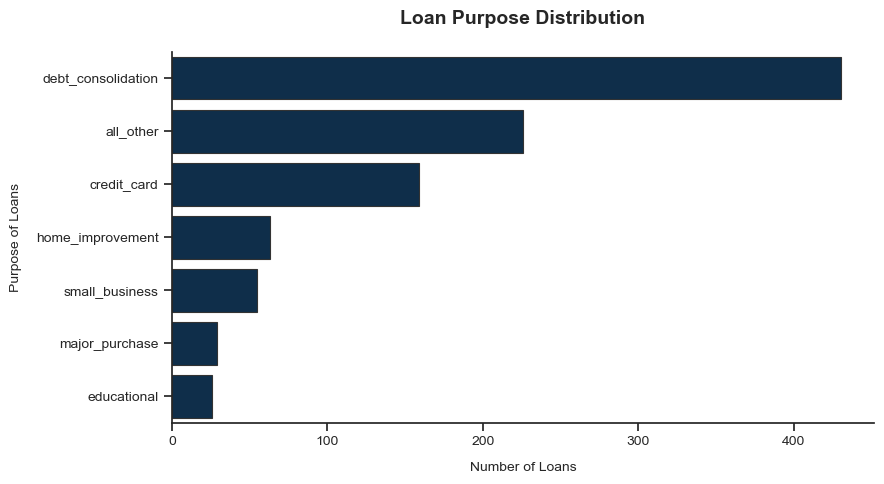

In [109]:
#visualising borrower behaviour by comparing the distribution of loan purposes
sns.set_theme(style='ticks')

darker_blue = "#0f2e4a"
plt.figure(figsize=(9,5))
sns.countplot(y='purpose', data=complete_data, 
              order=complete_data['purpose'].value_counts().index, 
              color=darker_blue,
              saturation=1, 
              edgecolor='0.2',
             linewidth=0.8)
plt.title('Loan Purpose Distribution', fontsize=14, weight='bold', pad=20)
plt.xlabel('Number of Loans', fontsize=10, labelpad=10)
plt.ylabel('Purpose of Loans', fontsize=10, labelpad=10)
plt.xticks(rotation=360,fontsize=10)
plt.yticks(fontsize=10)
sns.despine(top=True, right=True)
plt.tight_layout()

In [52]:
#summary statistics
complete_data.describe(include='all')

,loan id,customerid,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,...,first_name,last_name,email,gender,city,country,purpose_category,Risk,fico_category,High_Inquireis_and_Public_Records
count,988.000000,988,988.0,988,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,...,988,988,988,988,988,988,988,988,988,988
unique,NaN,988,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,...,927,979,988,8,971,118,3,2,4,2
top,NaN,C193,NaN,debt_consolidation,NaN,NaN,NaN,NaN,NaN,NaN,...,Cordell,Blest,ymalecky5c@constantcontact.com,Female,Rio Claro,China,Financial,Low Risk,Good,False
freq,NaN,1,NaN,430,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2,1,479,2,172,589,987,631,958
mean,499.627530,NaN,1.0,NaN,0.107586,309.394069,10.915483,11.383401,713.305668,4501.624831,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,287.825089,NaN,0.0,NaN,0.020391,201.056296,0.606900,6.732744,37.987836,2385.080073,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,1.0,NaN,0.060000,15.690000,8.517193,0.000000,627.000000,1110.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,251.750000,NaN,1.0,NaN,0.094500,158.665000,10.524064,5.877500,682.000000,2729.041667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,498.500000,NaN,1.0,NaN,0.107100,261.555000,10.907883,11.285000,707.000000,4130.958333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,748.250000,NaN,1.0,NaN,0.120400,404.620000,11.289782,16.807500,742.000000,5610.520834,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
complete_data['log.annual.inc'].skew()

np.float64(0.2618983829305737)

In [112]:
complete_data['dti'].skew()

np.float64(0.07974157226372533)

In [117]:
#calculating outlier threshold using standard deviation
#defining outliers as values more than 2 standard deviations from the mean for DTI and annual income

#creating new columns to flag outliers in Annual Income and DTI ratio using np.where() function
complete_data['isOutlier_log_annual_inc'] = np.where(
    abs(complete_data['log.annual.inc'] - complete_data['log.annual.inc'].mean()) 
    < 2*complete_data['log.annual.inc'].std(), False, True
)

complete_data['isOutlier_dti'] = np.where(
    abs(complete_data['dti'] - complete_data['dti'].mean()) 
    < 2*complete_data['dti'].std(), False, True
)

complete_data.head()

,loan id,customerid,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,...,email,gender,city,country,purpose_category,Risk,fico_category,High_Inquireis_and_Public_Records,isOutlier_log_annual_inc,isOutlier_dti
0,193,C193,1,debt_consolidation,0.0743,178.68,11.461632,1.20,812,16259.04167,...,ymalecky5c@constantcontact.com,Male,Lavradio,Portugal,Financial,Low Risk,Excellent,False,False,False
1,114,C114,1,debt_consolidation,0.0712,64.96,11.608236,0.22,812,16213.00000,...,sthalmann35@bloglines.com,Male,Rio Meão,Portugal,Financial,Low Risk,Excellent,False,False,False
2,920,C920,1,all_other,0.0800,313.37,10.274672,2.24,792,14100.00000,...,ycupittpj@etsy.com,Female,Muruni,Indonesia,Other,Low Risk,Very Good,False,False,False
3,56,C56,1,small_business,0.1059,398.69,11.002100,17.12,747,14008.95833,...,mdrohun1j@paypal.com,Male,Tendō,Japan,Educational/Buisness,Low Risk,Very Good,False,False,False
5,503,C503,1,credit_card,0.0832,160.57,10.985293,7.08,767,13319.04167,...,dkeelydy@alibaba.com,Female,Oued Lill,Tunisia,Financial,Low Risk,Very Good,False,False,False


## Question 2

### Does having a higher income necessarily mean a borrower has a healthier debt-to-income (DTI) ratio and a better chance of repaying the loan?

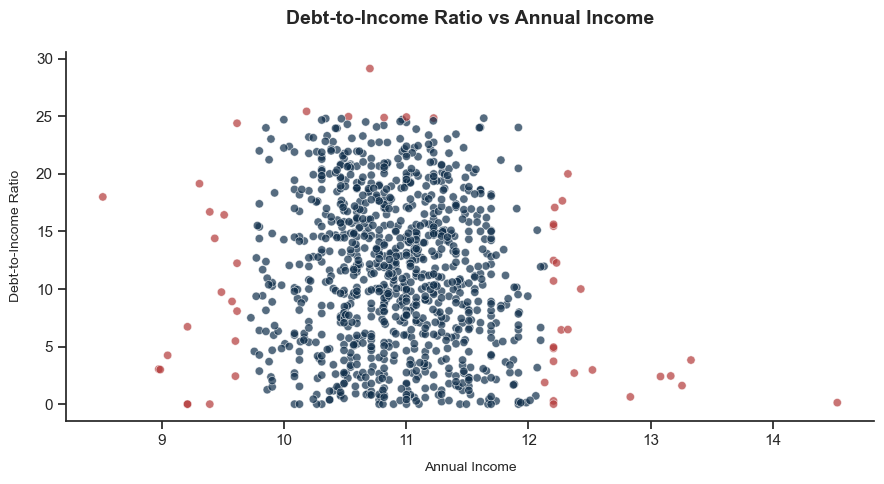

In [136]:
plt.figure(figsize=(9,5))

dark_red='#B33939'
darker_blue = "#0f2e4a"

#visualising the outliers
col = [
    dark_red if i+j else darker_blue for i,j in zip(
    complete_data['isOutlier_log_annual_inc'], 
    complete_data['isOutlier_dti'])
]

#visualising the relationship between DTI ratio and borrower's annual income
sns.scatterplot(x='log.annual.inc', 
                y = 'dti', 
                data = complete_data, 
                color=col, 
                alpha=0.7)
sns.despine(top=True, right=True)
plt.title('Debt-to-Income Ratio vs Annual Income', fontsize=14, weight='bold', pad=20)
plt.xlabel('Annual Income', fontsize=10, labelpad=10)
plt.ylabel('Debt-to-Income Ratio', fontsize=10, labelpad=10)
plt.tight_layout()

## Question 3 

### What is the overall credit quality of borrowers, and do most customers fall within a riskier or safer FICO score range?

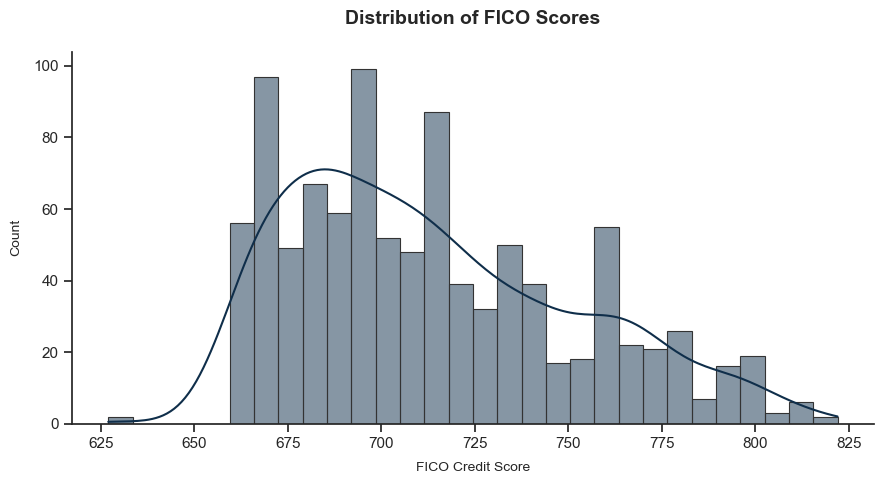

In [138]:
plt.figure(figsize=(9,5))

darker_blue = "#0f2e4a"

#visualising the distribution of creditworthiness amongst borrowers
sns.histplot(complete_data['fico'], 
             bins=30,
             kde=True,
             color=darker_blue,
             edgecolor='0.2',
             linewidth=0.8)
plt.title('Distribution of FICO Scores', fontsize=14, weight='bold', pad=20)
plt.xlabel('FICO Credit Score', fontsize=10, labelpad=8)
plt.ylabel('Count', fontsize=10, labelpad=8)
sns.despine(top=True, right=True)
plt.tight_layout()

In [140]:
complete_data['fico_category'].value_counts()

fico_category
Good         631
Very Good    234
Fair         106
Excellent     17
Name: count, dtype: int64

## Question 4

### Do higher-risk borrowers actually receive higher interest rates, and could higher rates themselves impact a borrower’s ability to repay?

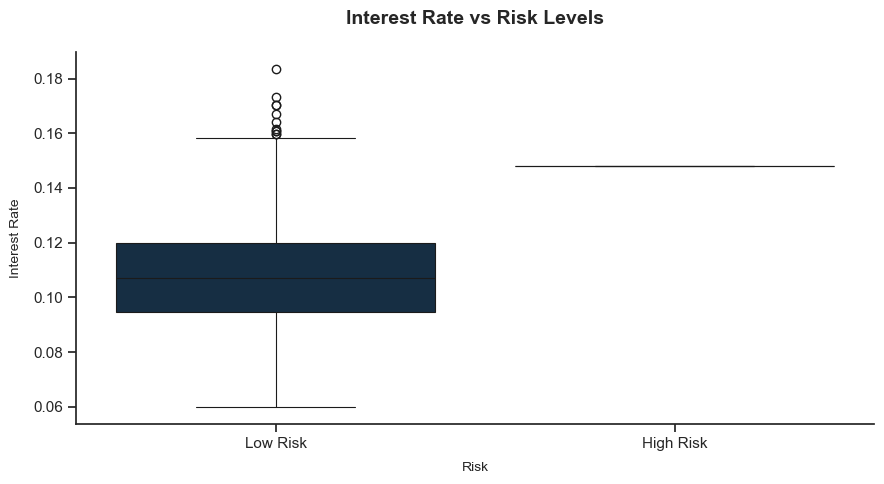

In [124]:
plt.figure(figsize=(9,5))
darker_blue = "#0f2e4a"

#visualising how borrowers risk levels affect interest rates
sns.boxplot (x= 'Risk', y='int.rate', 
             data = complete_data,
             color=darker_blue,
             linewidth=0.8)
plt.title('Interest Rate vs Risk Levels', fontsize=14, weight='bold', pad=20)
plt.xlabel('Risk', fontsize=10, labelpad=8)
plt.ylabel('Interest Rate', fontsize=10, labelpad=8)
sns.despine(top=True, right=True)
plt.tight_layout()

In [121]:
complete_data['Risk'].value_counts()

Risk
Low Risk     987
High Risk      1
Name: count, dtype: int64

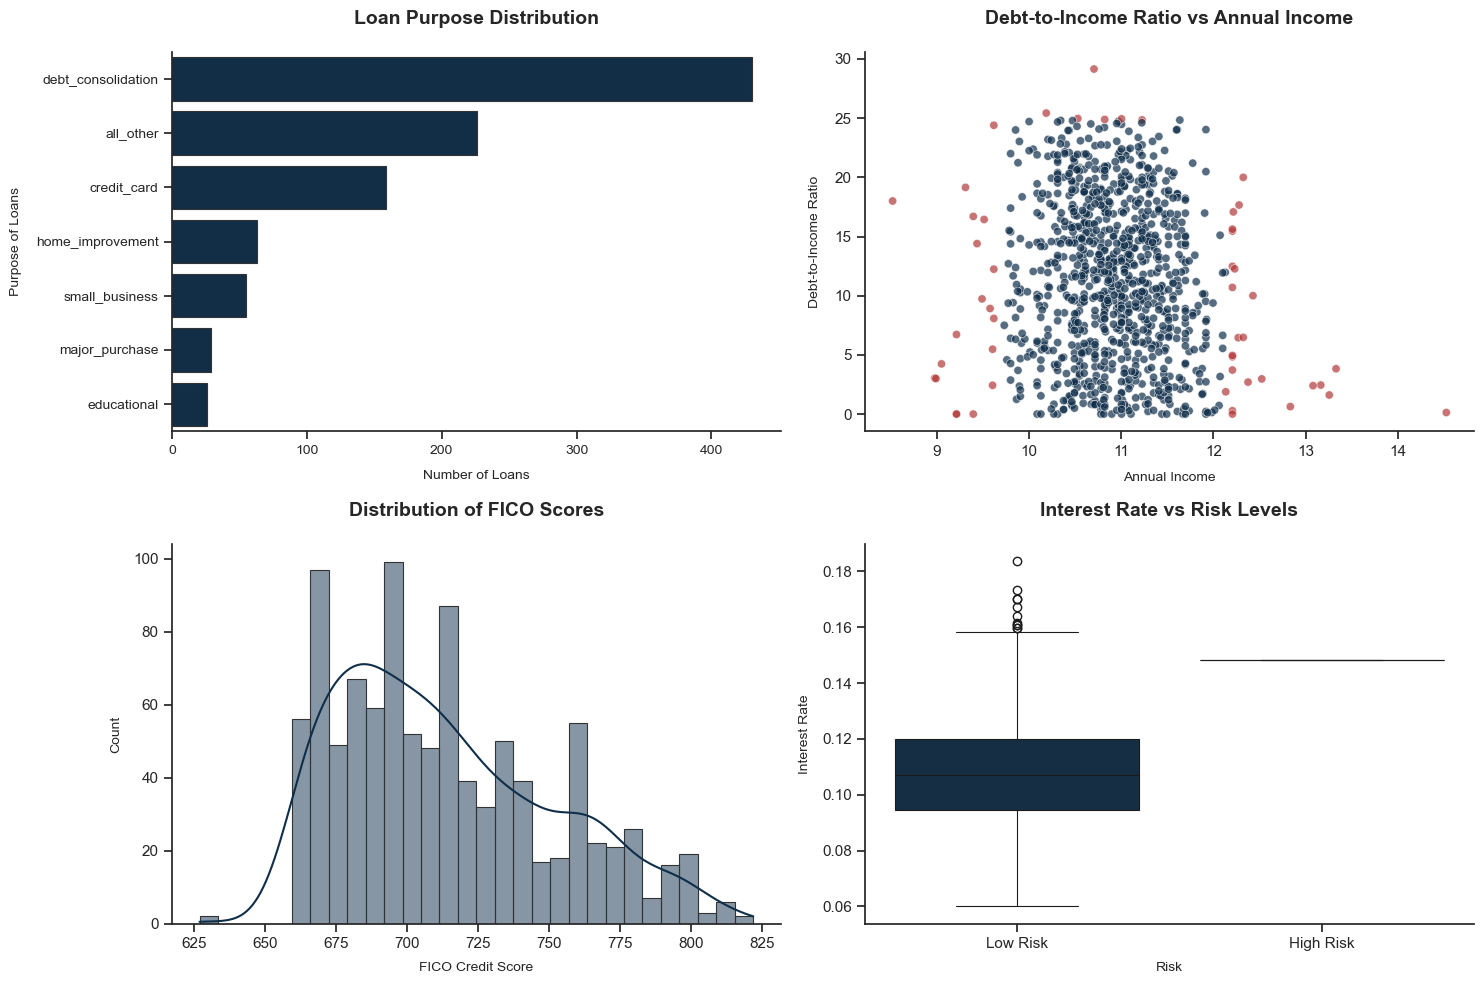

In [139]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
############################# Graph1 ##################################################################
darker_blue = "#0f2e4a"
sns.countplot(y='purpose', data=complete_data, 
              order=complete_data['purpose'].value_counts().index, 
              color=darker_blue,
              saturation=0.9, 
              edgecolor='0.2',
             linewidth=0.8,
             ax=axs[0,0])
axs[0,0].set_title('Loan Purpose Distribution', fontsize=14, weight='bold', pad=20)
plt.setp(axs[0, 0].xaxis.get_majorticklabels(), rotation=360)
axs[0,0].set_xlabel('Number of Loans', fontsize=10, labelpad=10)
axs[0,0].set_ylabel('Purpose of Loans', fontsize=10, labelpad=10)
axs[0,0].tick_params(axis='x', labelrotation=360,labelsize=10)
axs[0,0].tick_params(axis='y', labelsize=10)
sns.despine(ax=axs[0,0], top=True, right=True)


############################ Graph2 #####################################################################
sns.scatterplot(x='log.annual.inc', 
                y = 'dti', 
                data = complete_data, 
                color=col,
                alpha=0.7,
                ax=axs[0,1])
ax=axs[0,1].set_title('Debt-to-Income Ratio vs Annual Income', fontsize=14, weight='bold', pad=20)
ax=axs[0,1].set_xlabel('Annual Income', fontsize=10, labelpad=10)
ax=axs[0,1].set_ylabel('Debt-to-Income Ratio', fontsize=10, labelpad=10)
sns.despine(ax=axs[0,1], top=True, right=True)



############################# Graph3 ######################################################################
sns.histplot(complete_data['fico'], 
             bins=30,
             kde=True,
             color=darker_blue,
             edgecolor='0.2',
             linewidth=0.8,
            ax=axs[1,0])
axs[1,0].set_title('Distribution of FICO Scores', fontsize=14, weight='bold', pad=20)
axs[1,0].set_xlabel('FICO Credit Score', fontsize=10, labelpad=8)
axs[1,0].set_ylabel('Count', fontsize=10, labelpad=8)
sns.despine(ax=axs[1,0], top=True, right=True)



########################### Graph4 ###########################################################################
sns.boxplot (x= 'Risk', y='int.rate', 
             data = complete_data,
             color=darker_blue,
             linewidth=0.8,
            ax=axs[1,1])
axs[1,1].set_title('Interest Rate vs Risk Levels', fontsize=14, weight='bold', pad=20)
axs[1,1].set_xlabel('Risk', fontsize=10, labelpad=8)
axs[1,1].set_ylabel('Interest Rate', fontsize=10, labelpad=8)
sns.despine(ax=axs[1,1], top=True, right=True)
plt.tight_layout()

# Key Findings

1. **Loan Purpose Distribution:**  
   - Most borrowers take out loans mainly for debt consolidation or credit card refinancing. This shows that majority of the borrowers are already trying to manage existing debt and are under financial pressures. As such, there is high risk of default by these borrowers.

2. **Debt-to-Income Ratio vs Annual Income:**  
   - There is no clear correlation between income and DTI. However, most DTI ratios fall within acceptable lending range (<20%), and only a small number are extreme outliers. These outliers may be borrowers who may struggle to repay due to financial stress. From the graph, the ability for borrowers to repay varies, but most borrowers are financially stable enough to repay their loans.

3. **Distribution of FICO Scores:**  
   - Majority of the borrowers at LendingClub have between Good to Very Good FICO scores (675 and 725) which indicates a high probability of borrowers paying their loans back in full. This shows that LendingClub is mostly lending to creditworthy borrowers. However, some borrowers fall within the fair range (630 - 670). To manage this, LendingCo could implement risk management strategies like stricter loan terms to minimize lending to these groups.

4. **Interest Rate vs Risk Levels:**  
   - The dataset shows that most of the borrowers are low-risk, only 1 of the total borrowers was classed as high-risk.
  

# Conclusion
Based on the overall analysis, most borrowers in LendingClub’s portfolio are likely to repay their loans in full, given that majority have relatively strong credit profiles and moderate debt-to-income levels. However, borrowers taking loans for debt consolidation and those with high DTI ratios have higher risk of default. Given that the relationship between income and repayment ability is weak, risk assessment should focuse more on borrower's DTI, credit score, and their purpose for seeking a loan over income.